# PCA y Clustering

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Exploración

In [3]:
df = pd.read_csv('data/student_habits_performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
print(df.select_dtypes(include='object').columns.tolist())
df_pre = df.drop(columns=['student_id','gender', 'part_time_job', 'parental_education_level', 'extracurricular_participation'])
print(df_pre.select_dtypes(include='object').columns.tolist())
df_pre.info()

['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
['diet_quality', 'internet_quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int64  
 1   study_hours_per_day    1000 non-null   float64
 2   social_media_hours     1000 non-null   float64
 3   netflix_hours          1000 non-null   float64
 4   attendance_percentage  1000 non-null   float64
 5   sleep_hours            1000 non-null   float64
 6   diet_quality           1000 non-null   object 
 7   exercise_frequency     1000 non-null   int64  
 8   internet_quality       1000 non-null   object 
 9   mental_health_rating   1000 non-null   int64  
 10  exam_score             1000 non-null   float64
dtypes: float64(6), int64(3), object(2)
me

## ONEHOTENCODING

### Como vimos que es una bd completa con 0 nulls, procedo directo con el encoding. Ya no es necesario rellenar los blancos.

In [5]:
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = onehot.fit_transform(df_pre[['diet_quality', 'internet_quality']])
encoded_df = pd.DataFrame(
    encoded,
    columns=onehot.get_feature_names_out(['diet_quality', 'internet_quality']),
    index=df_pre.index
)
df_process = pd.concat([df_pre.drop(['diet_quality', 'internet_quality'], axis=1), encoded_df], axis=1)
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   study_hours_per_day       1000 non-null   float64
 2   social_media_hours        1000 non-null   float64
 3   netflix_hours             1000 non-null   float64
 4   attendance_percentage     1000 non-null   float64
 5   sleep_hours               1000 non-null   float64
 6   exercise_frequency        1000 non-null   int64  
 7   mental_health_rating      1000 non-null   int64  
 8   exam_score                1000 non-null   float64
 9   diet_quality_Fair         1000 non-null   float64
 10  diet_quality_Good         1000 non-null   float64
 11  diet_quality_Poor         1000 non-null   float64
 12  internet_quality_Average  1000 non-null   float64
 13  internet_quality_Good     1000 non-null   float64
 14  internet_

In [6]:
df_process

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_Fair,diet_quality_Good,diet_quality_Poor,internet_quality_Average,internet_quality_Good,internet_quality_Poor
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1.0,0.0,0.0,1.0,0.0,0.0
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,0.0,1.0,0.0,1.0,0.0,0.0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0.0,0.0,1.0,0.0,0.0,1.0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0.0,0.0,1.0,0.0,1.0,0.0
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,1.0,0.0,0.0,0.0,1.0,0.0
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0.0,0.0,1.0,1.0,0.0,0.0
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,0.0,1.0,0.0,0.0,1.0,0.0
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,1.0,0.0,0.0,1.0,0.0,0.0


## Reducción de Dimensiones PCA

In [7]:
pca = PCA(n_components=2)
pca_components_v0 = pd.DataFrame(pca.fit_transform(df_process), columns=["pc1", "pc2"])

## 2 Columnas pca: pc1, pc2

In [8]:
print(f"Varianza total epxlicada: {np.sum(pca.explained_variance_ratio_) * 100}")
pca_components_v0

Varianza total epxlicada: 94.37414107123685


,pc1,pc2
0,-13.269089,1.734362
1,31.530505,10.935917
2,-34.728474,13.196933
3,-43.828987,-10.047151
4,-2.860624,7.063176
...,...,...
995,5.926333,-7.570050
996,-3.579587,2.140887
997,-6.539890,-21.889832
998,1.047086,15.891222


## Clustering Kmeans

Centroides de los clusters: 
[[-1.48716328e+01 -3.37879458e-01 -2.66453526e-15]
 [ 1.26684280e+01  2.87823242e-01  1.00000000e+00]]
En vscode: 
array([[ 12.66842797,   0.28782324], 
[-14.87163283,  -0.33787946]])


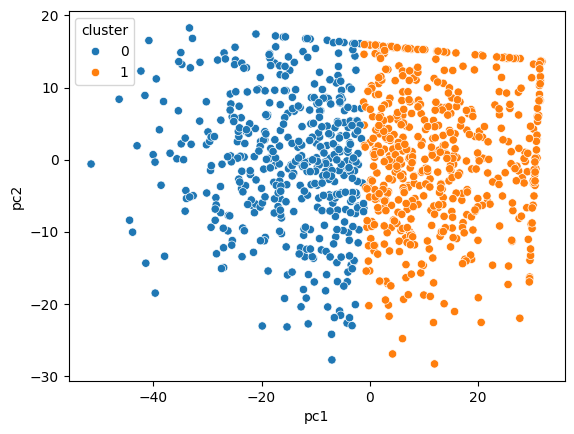

In [17]:
k_means = KMeans(n_clusters=2)
cluster_labels = k_means.fit_predict(pca_components_v0)
pca_components_v0["cluster"] =  cluster_labels
sns.scatterplot(x="pc1", y="pc2",hue="cluster", data=pca_components_v0)
print(f"Centroides de los clusters: \n{k_means.cluster_centers_}")
print("En vscode: \narray([[ 12.66842797,   0.28782324], \n[-14.87163283,  -0.33787946]])")

In [18]:
df_pca = pd.DataFrame(pca_components_v0, columns=["pc1", "pc2"])
df_pca["cluster"] = cluster_labels
df_pca["exam_score"] = df["exam_score"].values
df_pca.groupby("cluster")["exam_score"].mean()

cluster
0    54.855870
1    82.162593
Name: exam_score, dtype: float64

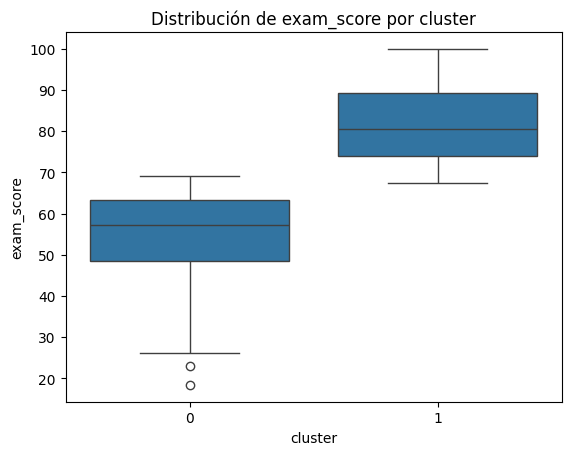

In [19]:
sns.boxplot(x="cluster", y="exam_score", data=df_pca)
plt.title("Distribución de exam_score por cluster")
plt.show()